<a href="https://colab.research.google.com/github/ghazalmohseni7/diabetes-predition/blob/main/diabet_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing libraries**

In [1]:
!pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 323 kB 19.4 MB/s 
  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.36-py3-none-any.whl size=9236 sha256=36e9fc7a4395796368fc3c0d79c5599370f7bdbbf49da54ae220921edef31135
  Stored in directory: /root/.cache/pip/wheels/ca/73/ed/41022b42c1d9ce60a8a2ebb71f042c7f895673760404d39fd7
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.42-py3-none-any.whl size=322677 sha256=87462feca964e96ce4a24d67347423a19e6dcc13f5dfd95bacf7d6063d0a5c3d
  Stored in directory: /root/.cache/pip/wheels/97/31/a0/5ddbb26189896b5d23d83b03bf9a74327a8091a610a6375785
  Created wheel for compress-json: filename=compress_json-1.0.7-py3-none-any.whl size=5233 sha256=77e8a6495bce67d867e80a5e0edfacba39542819ed00c4fa52b6437a286a49d2
  Stored in directory: /root/.cache/pip/wheels/6d/7e/13/0e370d719528969d430498ca952417324595d116776840b279
Successfu

In [2]:
import numpy as np
import pandas as pd
import seaborn as sbs
import statistics as st

## **connect to google drive**

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## **reading csv dataset from drive**

In [4]:
data=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/diabetes.csv')
datacpy=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/diabetes.csv')

In [5]:
print(type(data['Outcome'][0]))

<class 'numpy.int64'>


In [6]:
datacpy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **feature engineering**

In [7]:
# handeling missing values
# isnull is a function that write true in cell that value is nan
# print( type(data.isnull())) = <class 'pandas.core.frame.DataFrame'>
# print( type(data.isnull().values)) = <class 'numpy.ndarray'>
# any function return true if there is even one 'true'
# so at first we change our dataset to false and true . nan change to true other values change to false using isnull
#then change pandas to numpy arr using .values
# finall use any function to return true if finds a true . so if the result is false that means we dont have missing value


datacpy.isnull().values.any()

False

In [8]:
#handeling outliers using IQR
# at first find which columns have outlier using  boxplot
dataColumns=data.columns
print(dataColumns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [9]:
#replacing  outliers with median and zero values with mean
cols=dataColumns[0:8]
def handleOutLiers_MissingValues(dt):
  for x in cols:
    print(x)
    median=st.median(dt[x].to_list())
    mean=st.mean(dt[x].to_list())
    print('median : ', median , x)
    print('mean : ', mean , x)
    Q1=dt[x].quantile(0.25)
    Q3=dt[x].quantile(0.75)
    IQR=Q3-Q1
    lowerBound=Q1 -(1.5 * IQR)
    upperBound=Q3 +(1.5 * IQR) 
    dt.loc[dt[x]<lowerBound , x] = median
    dt.loc[dt[x]>upperBound , x] = median
    if x  in ['Insulin','SkinThickness' ]:
      dt.loc[dt[x]==0 ,x]=median




In [10]:
handleOutLiers_MissingValues(data)


Pregnancies
median :  3.0 Pregnancies
mean :  3.8450520833333335 Pregnancies
Glucose
median :  117.0 Glucose
mean :  120.89453125 Glucose
BloodPressure
median :  72.0 BloodPressure
mean :  69.10546875 BloodPressure
SkinThickness
median :  23.0 SkinThickness
mean :  20.536458333333332 SkinThickness
Insulin
median :  30.5 Insulin
mean :  79.79947916666667 Insulin
BMI
median :  32.0 BMI
mean :  31.992578125 BMI
DiabetesPedigreeFunction
median :  0.3725 DiabetesPedigreeFunction
mean :  0.4718763020833333 DiabetesPedigreeFunction
Age
median :  29.0 Age
mean :  33.240885416666664 Age


In [11]:
data.head(20)
# this data now is clear from outliers and missing values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.6270,50,1
1,1,85,66,29,30.5,26.6,0.3510,31,0
2,8,183,64,23,30.5,23.3,0.6720,32,1
3,1,89,66,23,94.0,28.1,0.1670,21,0
4,0,137,40,35,168.0,43.1,0.3725,33,1
5,5,116,74,23,30.5,25.6,0.2010,30,0
6,3,78,50,32,88.0,31.0,0.2480,26,1
7,10,115,72,23,30.5,35.3,0.1340,29,0
8,2,197,70,45,30.5,30.5,0.1580,53,1
9,8,125,96,23,30.5,32.0,0.2320,54,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


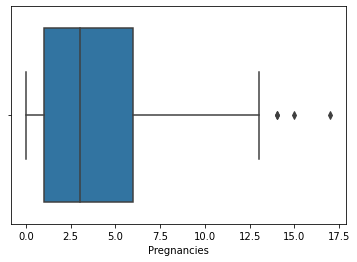

In [12]:
sbs.boxplot(datacpy[dataColumns[0]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


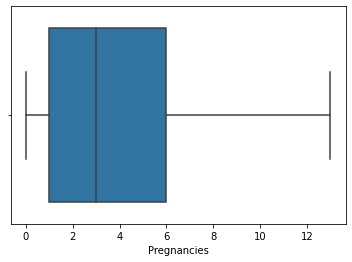

In [13]:
sbs.boxplot(data[dataColumns[0]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


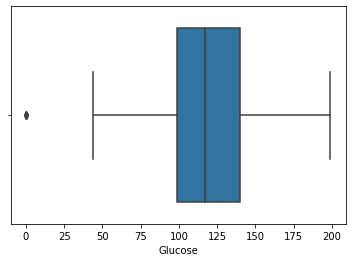

In [14]:
sbs.boxplot(datacpy[dataColumns[1]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


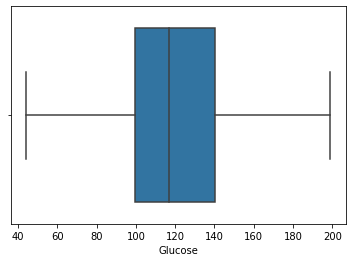

In [15]:
sbs.boxplot(data[dataColumns[1]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


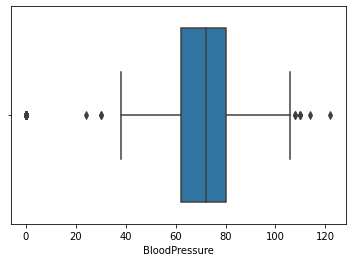

In [16]:
sbs.boxplot(datacpy[dataColumns[2]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


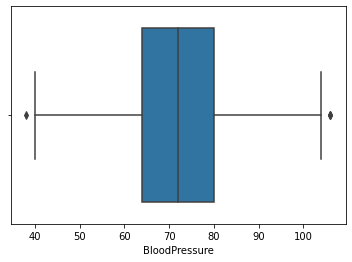

In [17]:
sbs.boxplot(data[dataColumns[2]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


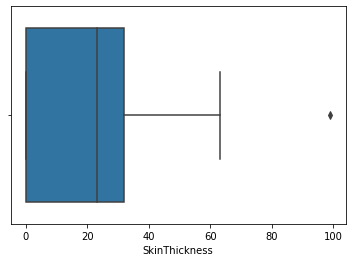

In [18]:
sbs.boxplot(datacpy[dataColumns[3]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


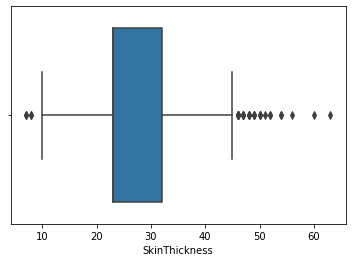

In [19]:
sbs.boxplot(data[dataColumns[3]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


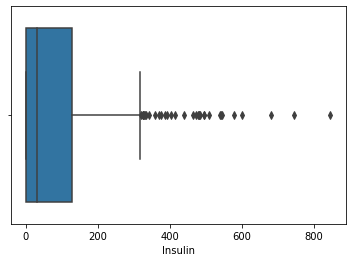

In [20]:
sbs.boxplot(datacpy[dataColumns[4]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


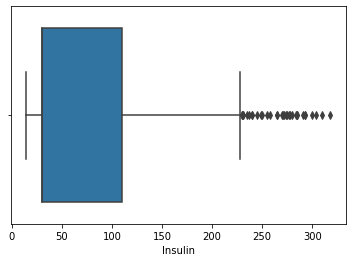

In [21]:
sbs.boxplot(data[dataColumns[4]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


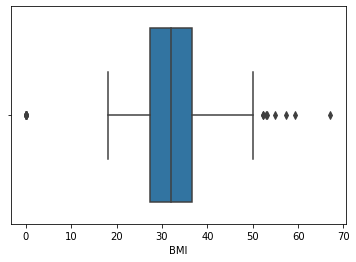

In [22]:
sbs.boxplot(datacpy[dataColumns[5]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


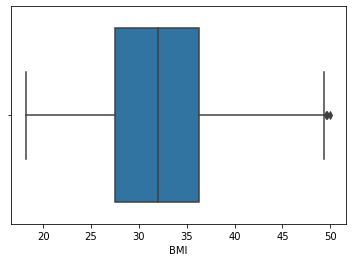

In [23]:
sbs.boxplot(data[dataColumns[5]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


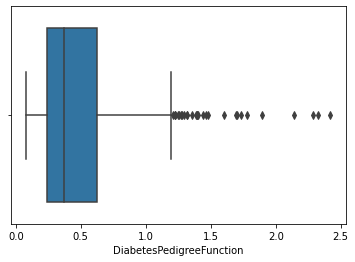

In [24]:
sbs.boxplot(datacpy[dataColumns[6]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


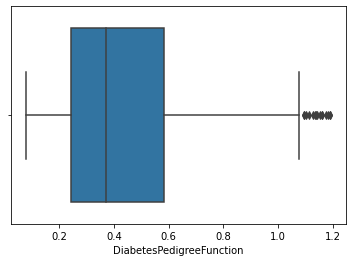

In [25]:
sbs.boxplot(data[dataColumns[6]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


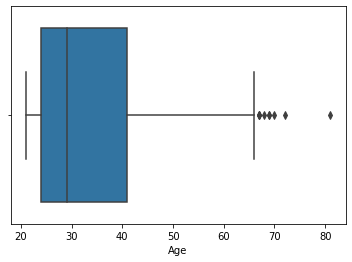

In [26]:
sbs.boxplot(datacpy[dataColumns[7]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


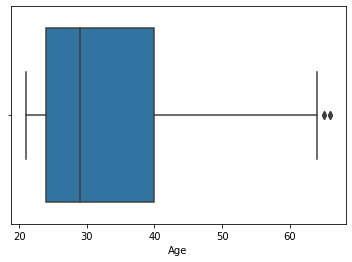

In [27]:
sbs.boxplot(data[dataColumns[7]])

In [28]:
diabetes_true_count = len(data.loc[data['Outcome'] == 1])
diabetes_false_count = len(data.loc[data['Outcome'] == 0])

In [29]:
print("Data having diabetes: " ,  diabetes_true_count)
print("Data not having diabetest: d" ,diabetes_false_count)

Data having diabetes:  268
Data not having diabetest: d 500


In [30]:
# checking values which are 0:
df=data
print("total number of rows : {0}".format(len(df)))
print("number of rows missing Glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows missing insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing age: {0}".format(len(df.loc[df['Age'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing Glucose: 0
number of rows missing BloodPressure: 0
number of rows missing insulin: 0
number of rows missing bmi: 0
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing age: 0
number of rows missing SkinThickness: 0


##  **start** **to** **create** **and** **train** **model**

In [31]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [32]:
classifier=Sequential()
classifier.add(Dense(units=64,activation='relu'))
classifier.add(Dense(units=32,activation='relu'))
classifier.add(Dense(units=16,activation='relu'))
# classifier.add(Dense(units=8,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [33]:
X = data[dataColumns[0:8]]
y = data['Outcome'].values
# note that x and y now are numpy arr x is data and y is label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((614, 8), (154, 8))

In [34]:
history=classifier.fit(X_train, y_train, epochs=10,  validation_data=(X_test, y_test))

Epoch 1/10
20/20 [==============================] - 1s 13ms/step - loss: 3.5351 - accuracy: 0.4870 - val_loss: 0.8262 - val_accuracy: 0.5519
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.7396 - accuracy: 0.5896 - val_loss: 0.7165 - val_accuracy: 0.5325
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6276 - accuracy: 0.6726 - val_loss: 0.7480 - val_accuracy: 0.6234
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6251 - accuracy: 0.6824 - val_loss: 0.6596 - val_accuracy: 0.6558
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5961 - accuracy: 0.7068 - val_loss: 0.6280 - val_accuracy: 0.6364
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5914 - accuracy: 0.7020 - val_loss: 0.6370 - val_accuracy: 0.6429
Epoch 7/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5776 - accuracy: 0.6987 - val_loss: 0.6126 - val_accuracy: 0.6753
Epoch 8/10
20/20 [=

5/5 - 0s - loss: 0.5995 - accuracy: 0.7078 - 24ms/epoch - 5ms/step


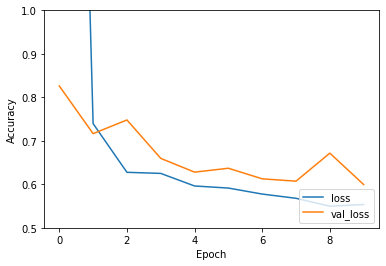

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = classifier.evaluate(X_test,  y_test, verbose=2)

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efd5a947a90>,
       dtype=object))

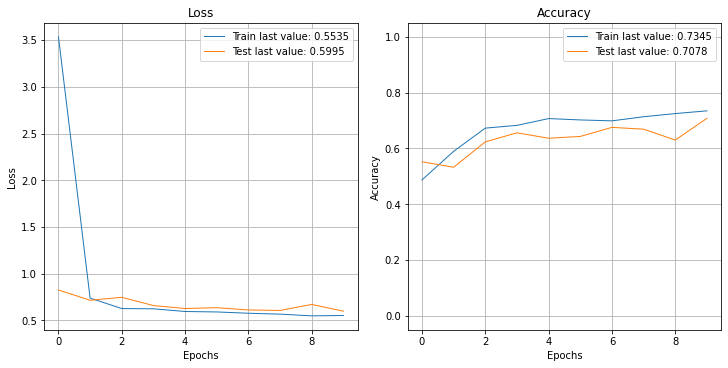

In [36]:

from plot_keras_history import show_history, plot_history
plot_history(history)

In [37]:
print(test_acc)

0.7077922224998474


In [38]:
classifier.save('diabetes_detection.h5')

In [39]:
from keras.models import load_model

Pregnancies= 4
Glucose = 200
BloodPressure = 75
SkinThickness = 45
Insulin=300
BMI=22.58
DiabetesPedigreeFunction=0.675
Age=22
data=[[6,148,72,35,0,33.6,0.627,50],[1,85,66,29,0,26.6,0.351,31],[8,183,64,0,0,23.3,0.672,32],[4,2000,75,45,1000,22.58,0.675,22]]
model=load_model('diabetes_detection.h5')
prediction=classifier.predict(data)

In [40]:
pred=(prediction > 0.5).astype('int32')
print(pred)

[[1]
 [1]
 [1]
 [1]]
